<a href="https://colab.research.google.com/github/Rajora0/keras_studies/blob/main/Deep_Learning_Keras_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning parte 1: Keras

## Carregando os dados

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

- https://github.com/zalandoresearch/fashion-mnist

In [ ]:
df = keras.datasets.fashion_mnist

In [ ]:
((X_train, y_train), (X_test, y_test)) = df.load_data()

## EDA

In [ ]:
for i in ((X_train, y_train), (X_test, y_test)):
  for x in i:
    print(np.shape(x))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, '9')

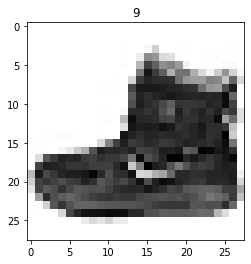

In [ ]:
plt.imshow(X_train[0], cmap='Greys')
plt.title(y_train[0])

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
url = 'https://github.com/zalandoresearch/fashion-mnist'
dfs = pd.read_html(url)

labels = dfs[1].Description
labels = list(labels)
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

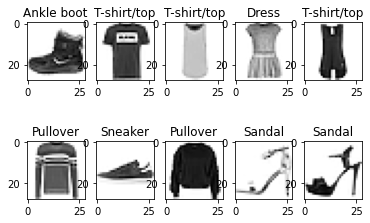

In [ ]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train[i], cmap='Greys')
  plt.title(labels[y_train[i]])

In [ ]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Criando o modelo de convnet

In [ ]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape = (28, 28)),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Treinando o modelo

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1483 - accuracy: 0.9440 - val_loss: 0.1556 - val_accuracy: 0.9432
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1452 - accuracy: 0.9456 - val_loss: 0.1786 - val_accuracy: 0.9362
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1402 - accuracy: 0.9478 - val_loss: 0.1671 - val_accuracy: 0.9352
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.9484 - val_loss: 0.1594 - val_accuracy: 0.9402
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1310 - accuracy: 0.9507 - val_loss: 0.1780 - val_accuracy: 0.9333
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1297 - accuracy: 0.9515 - val_loss: 0.1898 - val_accuracy: 0.9272
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1256 - accuracy: 0.9539 - val_loss: 0.1729 - val_accuracy:

## Score

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3272736072540283
Test accuracy: 0.8896999955177307


## Predição

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
test = model.predict(X_test)

In [ ]:
np.argmax(test)

21

In [ ]:
np.argmax(y_test[0])

9

In [ ]:
y_pred  = [np.argmax(i) for i in test]
y_test  = [np.argmax(i) for i in y_test]

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       994
           1       0.98      0.99      0.98       993
           2       0.81      0.80      0.81      1018
           3       0.89      0.90      0.90       985
           4       0.81      0.81      0.81       999
           5       0.96      0.98      0.97       984
           6       0.71      0.70      0.71      1021
           7       0.98      0.92      0.95      1064
           8       0.97      0.98      0.97       991
           9       0.93      0.98      0.96       951

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## History

In [ ]:
acc = history.history['accuracy']

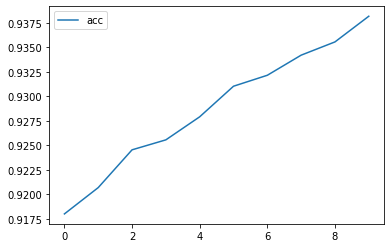

In [ ]:
plt.plot(acc, label='acc')
plt.legend()